# Schmitt Trigger

## Import and Formatting

The goal of this section is to import all the necessary files and libraries required for the subsequent data analysis.  
It also includes setting up the formatting parameters for the plots and visualizations.

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Formatting

Adjusting Plotly chart settings for clarity and consistency.

In [2]:
# ----  Formatting charts
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.edgecolor']  = "#bcbcbc"
mpl.rcParams['patch.linewidth'] = 0.5
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['axes.facecolor']  = "#eeeeee"
mpl.rcParams['axes.labelsize']  = "large"
mpl.rcParams['axes.grid']       = True
mpl.rcParams['grid.linestyle']  = "--"
mpl.rcParams['patch.edgecolor'] = "#eeeeee"
mpl.rcParams['axes.titlesize']  = "x-large"

## Objective

The objective of the upcoming notebooks is to present different electronic systems used to create Schmitt triggers.

A Schmitt trigger is a comparator **with hysteresis**.
Hysteresis corresponds to a **dissymmetry in the behavior** of a system: the forward path (when the input increases) is not identical to the return path (when the input decreases).

The [](#Hysteresiscurve) illustrates this phenomenon. Starting from the point $(0, 0)$, the system follows a first path as the input value increases toward positive values. When the input decreases, the system does not follow the same trajectory: this forms the hysteresis loop.

```{figure} ./images/Hysteresiscurve.svg
:name: Hysteresiscurve
:align: center
:width: 400px

Example of a hysteresis curve
```

The cycle we aim to build is represented in [](#Hysteresis_sharp_curve). We increase and decrease the input voltage until the system reaches saturation. The goal is to obtain both paths (forward and return) characteristic of hysteresis.

```{figure} ./images/Hysteresis_sharp_curve.svg
:name: Hysteresis_sharp_curve
:align: center
:width: 400px

Expected output curve with hysteresis
```

The electronic symbol of a Schmitt trigger is shown in [](#symbol_trigger).

```{figure} ./images/symbol_trigger.svg
:name: symbol_trigger
:align: center
:width: 200px

Electronic symbol of a Schmitt trigger
```

The notebooks will be divided into several parts:

1. **Using an operational amplifier (op-amp)** in a simple configuration to understand the basic principles of Schmitt triggers.
2. **Design using two bipolar transistors**, illustrating a more discrete approach.
3. **Study of the SN7414 component**, to observe the improvements offered by a dedicated integrated implementation.
4. **Implementation using MOS transistors**, to understand how this technology can also be used to create Schmitt triggers.

In the next section, we will examine what Schmitt triggers are used for and in which contexts they are applied.

### Use Cases

This type of system is commonly used in applications that rely on threshold detection.
However, when the input signal is noisy, unwanted state changes may occur solely due to noise, even if the actual signal level has not meaningfully changed.

This behavior is illustrated in the figure below, where noise around the threshold causes multiple undesired transitions.

In [3]:
# ------------------------------------------------------------
# Initialisation signal
# ------------------------------------------------------------
start = 0
end   = 1
num   = 1000
freq  = 5
n     = 0.2
t = np.linspace(0, 1, 1000)

x = np.random.normal(np.sin(t*2*np.pi*freq), n)
y = np.where(x > 0, 3, -3)

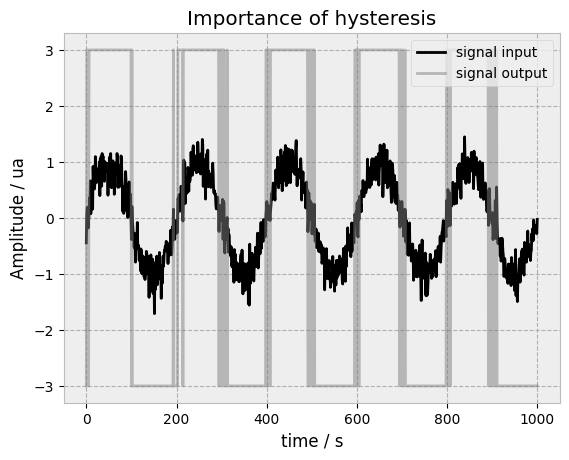

In [4]:
# ============================================================
# Output Voltage vs Load Resistance Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Importance of hysteresis")

# Load curve
plt.plot(t*1e3, x, "black", linewidth=2, label="signal input")
plt.plot(t*1e3, y, "grey", linewidth=2, alpha=0.5, label="signal output")

# Axis labels
plt.xlabel("time / s")
plt.ylabel("Amplitude / ua")

plt.legend(loc="upper right")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

It can be observed that, in the transition regions where the input signal is close to zero, the signal becomes highly noisy and the output exhibits multiple rapid back-and-forth transitions before stabilizing.

The purpose of introducing hysteresis is to eliminate this behavior, or at least reduce it as much as possible, by creating two distinct switching thresholds that make the system insensitive to small input fluctuations around the transition point.

In [5]:
# Source - https://stackoverflow.com/a
# Posted by Bas Swinckels, modified by community. See post 'Timeline' for change history
# Retrieved 2025-12-01, License - CC BY-SA 4.0

def hyst(x, th_lo, th_hi, initial = False):
    hi = x >= th_hi
    lo_or_hi = (x <= th_lo) | hi
    ind = np.nonzero(lo_or_hi)[0]
    if not ind.size: # prevent index error if ind is empty
        return np.zeros_like(x, dtype=bool) | initial
    cnt = np.cumsum(lo_or_hi) # from 0 to len(ind)
    return np.where(cnt, hi[ind[cnt-1]], initial)


In [6]:
y_hist = hyst(x, -.3, .3)

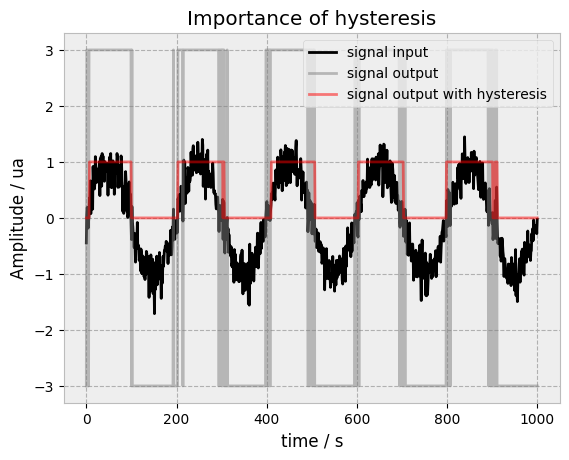

In [7]:
# ============================================================
# Output Voltage vs Load Resistance Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Importance of hysteresis")

# Load curve
plt.plot(t*1e3, x, "black", linewidth=2, label="signal input")
plt.plot(t*1e3, y, "grey", linewidth=2, alpha=0.5, label="signal output")
plt.plot(t*1e3, y_hist, "red", linewidth=2, alpha=0.5, label="signal output with hysteresis")

# Axis labels
plt.xlabel("time / s")
plt.ylabel("Amplitude / ua")

plt.legend(loc="upper right")

# Display the plot
plt.show()

# ============================================================
# End of Plot
# ============================================================

It can now be observed that the transition regions are much cleaner. The output no longer exhibits multiple rapid transitions between the high and low states.

Once the system changes state, a significant change in the input is required before another state transition can occur.

## Summary — Advantages of Using a Hysteresis System

* **System stability:** Reduces rapid and unwanted switching cycles, ensuring smoother and more stable operation.

* **Extended lifetime:** By limiting unnecessary switching, component stress and wear—especially in elements such as electrical contacts—are significantly reduced.

* **Energy efficiency:** Fewer state transitions mean lower dynamic power losses. In addition, reduced switching activity results in less heat dissipation.

* **Improved reliability:** The system becomes far less sensitive to noise and small input fluctuations, leading to more predictable and robust behavior.